In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/house-rent-prediction-dataset/Dataset Glossary.txt
/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv


**Housing Rent Dataset**

This notebook focuses on analyzing a housing rent dataset from India's rental market in 2022. The dataset is obtained from Kaggle, and [you can download the dataset here](http://https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset)

Purpose:
The purpose of this notebook is to provide an example of exploratory data analysis (EDA) and feature engineering for someone who is interested in analyzing rental market data.

In [2]:
df = pd.read_csv('../input/house-rent-prediction-dataset/House_Rent_Dataset.csv')

First, let's examine the date range of all the postings in the dataset, as well as the features present.

In [3]:
print(df['Posted On'].sort_values())

1222    2022-04-13
244     2022-04-23
418     2022-04-23
303     2022-04-23
413     2022-04-23
           ...    
4368    2022-07-10
4126    2022-07-10
4546    2022-07-10
3743    2022-07-10
3552    2022-07-11
Name: Posted On, Length: 4746, dtype: object


In [4]:
print(df.head())

    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner

The dataset contains 12 features, and the date range of all the postings is between April and July of 2022. Now, let's describe each feature in the dataset.

**Dataset Description And Features Summary**

The dataset consists of the following features and data types:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


Our dataset includes the following columns:

A singular date column: 
* Posted On: The date on which posting was created 

4 continious variables:
* BHK: Number of Bedrooms, Hall, Kitchen.
* Rent: Rent of the Houses/Apartments/Flats. 
* Size: Size of the Houses/Apartments/Flats in Square Feet. 
* Bathroom: Number of Bathrooms.


And 7 categorical variables: 
* Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.). 
* Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area. 
* Area Locality: Locality of the Houses/Apartments/Flats. 
* City: City where the Houses/Apartments/Flats are Located. 
* Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished. 
* Tenant Preferred: Type of Tenant Preferred by the Owner or Agent. 
* Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats. 

These features provide information about the rental properties, including their specifications, location, and contact details.

**Plan For Data Exploration**

The initial plan for data exploration involves the following steps:

* Checking for missing values: We will assess if there are any missing values in the dataset that need to be handled appropriately.

* Checking for duplicates: We will identify and handle any duplicate records in the dataset to ensure data integrity.

* Examining statistical properties of the target variable, rent: We will analyze the distribution of rent, including measures such as mean, median, and standard deviation, to gain insights into its characteristics.

* Examining types of categorical features: We will explore the unique categories and their frequencies within each categorical feature to understand the diversity and prevalence of different values.

* Examining correlations of features and rent: We will investigate the relationships between the various features and the target variable, rent, to determine any potential correlations or patterns.

By conducting these exploratory analyses, we aim to gain a comprehensive understanding of the dataset and uncover valuable insights that can inform further analysis and modeling tasks.


*Checking for missing/NA values:*

Existing null values:

In [6]:
print('Number of missing values: ')
df.isnull().sum()

Number of missing values: 


Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

Existing NA values:

In [7]:
print('Number of NA values: ')
print(df.isna().sum())

Number of NA values: 
Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64


Our dataset is complete, and there are no missing or NA values present. This indicates that all the required information for each observation is available in the dataset, allowing us to proceed with the analysis without the need for imputation or handling missing data.

*Checking for duplicate values:*

In [8]:
print('Following data entries are duplicates:')
duplicate = df[df.index.duplicated()]
duplicate

Following data entries are duplicates:


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact


Our dataset does not contain any duplicate records. Each observation in the dataset is unique, ensuring data integrity and avoiding any potential biases that duplicate entries may introduce.

**Preliminary Statistical Examination of the Target Variable (Rent)**

Let's conduct a preliminary statistical examination of the target variable, rent. This will provide us with an overview of its distribution and key statistical properties.

In [9]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) #Removing scientific notation

In [10]:
print('Rent Variable Statistical Description')
rent_description=df['Rent'].describe()
print(rent_description)

Rent Variable Statistical Description
count      4746.00
mean      34993.45
std       78106.41
min        1200.00
25%       10000.00
50%       16000.00
75%       33000.00
max     3500000.00
Name: Rent, dtype: float64


From the provided statistical information, we observe potential outliers in the rent variable due to the large difference between the minimum and maximum values. However, no other anomalies or issues can be identified solely based on this information. Further exploration and analysis are necessary to gain a deeper understanding of the data and identify any additional anomalies or patterns.

To further examine the interquartile range and identify potential outliers in the rent variable, we will use a boxplot. By visualizing the distribution of the rent values, we can better understand the spread of the data and identify any extreme values that may be considered outliers.

[Text(0.5, 1.0, 'Rent Boxplot Information')]

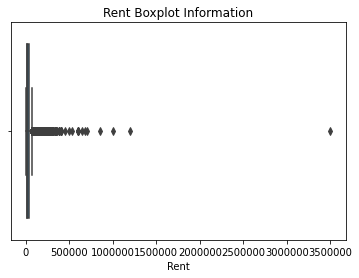

In [11]:
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(df['Rent']).set(title='Rent Boxplot Information')

After observing the boxplot, it appears that there are several outliers present in the rent variable. To make an informed decision on whether to keep or remove these outliers, we need to examine them more closely. By analyzing the specific characteristics and context of these outliers, we can determine if they are valid data points or if they should be treated as anomalies and potentially removed from the dataset.

In [12]:
rent_outliers = df.sort_values('Rent',ascending=False)
print("Potential Outliers:")
print(rent_outliers[:10])

Potential Outliers:
       Posted On  BHK     Rent  Size         Floor    Area Type  \
1837  2022-06-08    3  3500000  2500    4 out of 4  Carpet Area   
1001  2022-06-01    4  1200000  5000   4 out of 15  Carpet Area   
827   2022-05-18    4  1000000  3064  18 out of 45  Carpet Area   
1329  2022-06-23    4   850000  3200    2 out of 4  Carpet Area   
1459  2022-06-27    4   700000  3200  24 out of 24  Carpet Area   
1484  2022-07-07    4   680000  1962  18 out of 20  Carpet Area   
1319  2022-05-31    5   650000  3000   8 out of 10  Carpet Area   
726   2022-06-20    4   600000  2500  12 out of 13  Carpet Area   
1384  2022-05-27    5   600000  4500   7 out of 20  Carpet Area   
792   2022-06-13    5   600000  3200  10 out of 16  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
1837              Marathahalli  Bangalore    Semi-Furnished         Bachelors   
1001                      Juhu     Mumbai    Semi-Furnished  Bachelors/Family   

After analyzing the outliers in the rent variable, it appears that the first four data points have abnormally high rent values that cannot be explained by the other variables present in our dataset. While these outliers could potentially be influenced by factors such as building quality or construction date, since we lack such information in our dataset, it is reasonable to remove these outliers from further analysis. By removing these outliers, we can obtain a clearer view of the distribution and characteristics of the rent variable. Let's remove the outliers and re-examine the boxplot to see the updated distribution.

In [13]:
df = df[df['Rent']<850000] #Dropping all data points where rent is equal or greater to 850000

[Text(0.5, 1.0, 'Rent Boxplot Information')]

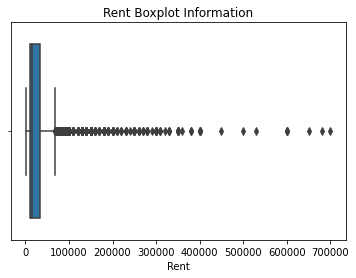

In [14]:
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(df['Rent']).set(title='Rent Boxplot Information')

Even after removing the initial outliers, it seems that there are still several data points outside of the maximum range in the rent variable. To ensure that we are not overlooking any important information, let's examine these data points more closely. By investigating the characteristics of these remaining outliers, we can determine if they should be considered valid data points or if further action, such as additional filtering or transformation, is necessary.

In [15]:
rent_description=df['Rent'].describe() #Recalculating statistics with outliers removed
maximum_whisker= rent_description['75%'] + 1.5*(rent_description['75%']-rent_description['25%'])
print('Amount of points above maximum:',len(df[df['Rent']>maximum_whisker]))
print('')
print(df[df['Rent']>maximum_whisker].sort_values(by='Rent',ascending=False)[:10])

Amount of points above maximum: 516

       Posted On  BHK    Rent  Size         Floor    Area Type  \
1459  2022-06-27    4  700000  3200  24 out of 24  Carpet Area   
1484  2022-07-07    4  680000  1962  18 out of 20  Carpet Area   
1319  2022-05-31    5  650000  3000   8 out of 10  Carpet Area   
1384  2022-05-27    5  600000  4500   7 out of 20  Carpet Area   
792   2022-06-13    5  600000  3200  10 out of 16  Carpet Area   
726   2022-06-20    4  600000  2500  12 out of 13  Carpet Area   
3656  2022-07-06    2  600000   950    1 out of 1  Carpet Area   
2750  2022-06-11    4  530000  4000    3 out of 4  Carpet Area   
1023  2022-07-09    5  500000  3900    4 out of 6  Carpet Area   
839   2022-05-19    5  450000  3400    2 out of 5  Carpet Area   

                 Area Locality     City Furnishing Status  Tenant Preferred  \
1459   Lady Ratan Tower, Worli   Mumbai         Furnished  Bachelors/Family   
1484                 Khar West   Mumbai    Semi-Furnished  Bachelors/Family   

After careful consideration, it appears that the data points lying well outside of our maximum range do not exhibit any clear indications of being anomalous. Since these data points constitute a significant portion of our dataset, it is reasonable to retain them. It is possible that these outliers can be explained by some unknown variables or factors that are not captured in our current dataset. Leaving these data points intact will ensure that we preserve the integrity of our analysis and avoid potentially excluding important information that could contribute to a comprehensive understanding of the rental market.

**Let's examine the distribution of the rent variable by creating a histogram:**

Skewness of Rent Variable: 5.035145847960744


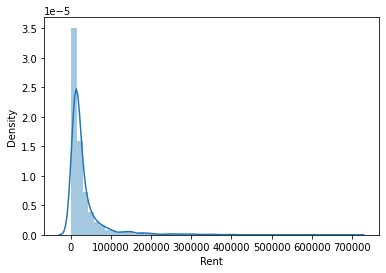

In [16]:
rent_distribution = sns.distplot(df['Rent'])
print(f"Skewness of Rent Variable: {df['Rent'].skew()}")

As anticipated from our examination of the boxplot, the rent data appears to be highly skewed, as indicated by a skewness value of 5. To address this skewness and potentially achieve a more normal distribution, let's apply a log transformation to the rent variable. The log transform can help reduce the impact of extreme values and make the distribution more symmetrical. 

Skewness of Rent Variable: 0.8592791570371967


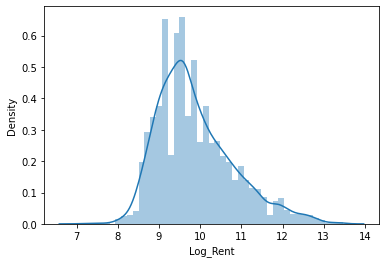

In [17]:
df['Log_Rent'] = np.log(df['Rent'])
rent_distribution_log = sns.distplot(df['Log_Rent'])
print(f"Skewness of Rent Variable: {df['Log_Rent'].skew()}")

After applying the log transform to the rent variable, we observe that the skewness has reduced to a moderate value of 0.85. While the distribution is not perfectly normal, it is now much closer to a normal distribution compared to the original highly skewed distribution. 

**Examining continuous features correlations to the target variable:**
By analyzing the relationships between these variables, we can identify any significant correlations and understand how the continuous features may impact the rent prices. This analysis can provide valuable insights into the key factors influencing rental prices in the Indian market.

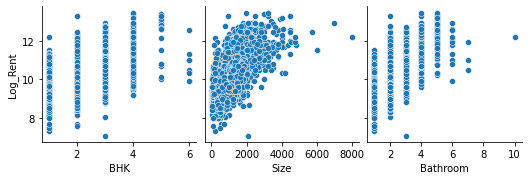

In [18]:
df_num = df.select_dtypes(include = ['int64','float64'])
sns.pairplot(data=df_num,
            x_vars=df_num[['BHK','Size','Bathroom']],
            y_vars=['Log_Rent'])

Based on the visual examination of the correlations, it seems that the correlations between the continuous features and the target variable (rent) appear reasonable. Although there are a few data points that lie outside of the normal ranges, they do not appear to deviate in a problematic manner from the overall pattern. It is possible that with a larger dataset or more data points, these outliers could align more closely with the rest of the values. Collecting additional data could provide further insights and help validate the observed correlations.

**Correlation Heatmap for Numeric Variables** \
Let's generate a correlation heatmap to confirm the suitability of the numeric variables for linear regression analysis. The correlation heatmap will provide a visual representation of the correlations between the numeric variables, including the target variable (rent). By examining the correlation coefficients, we can assess the strength and direction of the relationships between these variables and determine if they are suitable for linear regression modeling.

In [19]:
df_num_corr = df_num[['BHK','Rent','Size','Bathroom']].corr()
df_num_corr.style.background_gradient(cmap ='coolwarm')

,BHK,Rent,Size,Bathroom
BHK,1.000000,0.491727,0.715737,0.794140
Rent,0.491727,1.000000,0.513999,0.593913
Size,0.715737,0.513999,1.000000,0.740503
Bathroom,0.794140,0.593913,0.740503,1.000000


In [20]:
df_num_corr = df_num[['BHK','Log_Rent','Size','Bathroom']].corr()
df_num_corr.style.background_gradient(cmap ='coolwarm')

,BHK,Log_Rent,Size,Bathroom
BHK,1.000000,0.595286,0.715737,0.794140
Log_Rent,0.595286,1.000000,0.562402,0.692003
Size,0.715737,0.562402,1.000000,0.740503
Bathroom,0.794140,0.692003,0.740503,1.000000


From the correlation heatmap, we observe that all the numerical features have a correlation of at least 0.5 with the log-normalized rent variable. It is interesting to note that the correlation appears to be stronger in the log-transformed target variable compared to the original target variable. This observation aligns with our expectation, as using Pearson linear correlations can be affected by the presence of large values in the non-transformed target variable. By applying the log transformation, we mitigate the influence of extreme values and obtain a more reliable measure of the relationships between the numerical features and the rent variable. These findings support the suitability of the numerical features for inclusion in linear regression modeling, as they exhibit significant correlations with the target variable.

**Correlation of Numerical Features** \
Let's examine the correlations between the numerical features in our dataset. This analysis will provide insights into the relationships among these variables, helping us understand any potential dependencies or patterns that exist.

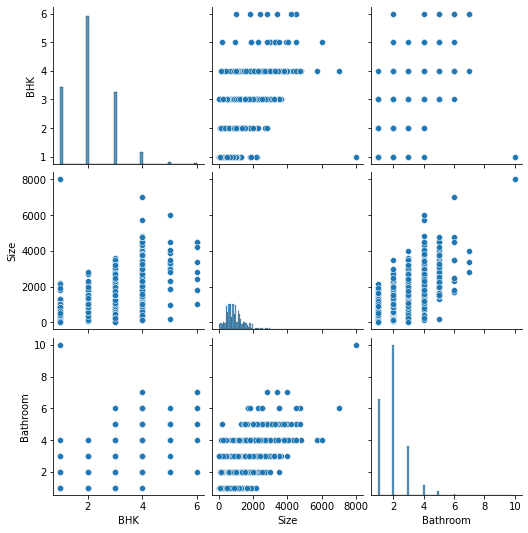

In [21]:
sns.pairplot(data=df_num,
            x_vars=df_num[['BHK','Size','Bathroom']],y_vars=df_num[['BHK','Size','Bathroom']])

There is an unusual outlier in our dataset where a property has 1 room and 10 bathrooms. While we will ignore it for now, it would be worthwhile to investigate this data point further in the future. Aside from this outlier, we haven't observed any other anomalous correlations or issues. However, it appears that the features "size" and "bathroom" exhibit skewness. To address this, let's apply a log transform to these features and generate a correlation heatmap to examine if the correlations with our target variable become stronger after the transformation.

In [22]:
df_num['Log_Bathroom'] = np.log(df_num['Bathroom'])
df_num['Log_Size'] = np.log(df_num['Size'])
df_num_corr = df_num.corr()
df_num_corr.style.background_gradient(cmap ='coolwarm')

,BHK,Rent,Size,Bathroom,Log_Rent,Log_Bathroom,Log_Size
BHK,1.000000,0.491727,0.715737,0.794140,0.595286,0.781217,0.620572
Rent,0.491727,1.000000,0.513999,0.593913,0.798708,0.500745,0.371355
Size,0.715737,0.513999,1.000000,0.740503,0.562402,0.678823,0.847104
Bathroom,0.794140,0.593913,0.740503,1.000000,0.692003,0.960277,0.609110
Log_Rent,0.595286,0.798708,0.562402,0.692003,1.000000,0.666024,0.483661
Log_Bathroom,0.781217,0.500745,0.678823,0.960277,0.666024,1.000000,0.612227
Log_Size,0.620572,0.371355,0.847104,0.609110,0.483661,0.612227,1.000000


Unfortunately, after applying a log transform to the "size" and "bathroom" features, there does not appear to be a significant increase in their correlation with the target variable. As a result, we will leave these features unchanged for now. While feature transformations can sometimes enhance correlations, it seems that in this case, the log transform does not provide a substantial improvement. We will retain the original values of these features in our analysis.

**Exploring Categorical Variables**

In [23]:
df_cat = df.select_dtypes(include = ['object'])

df_cat.drop('Posted On',axis=1,inplace=True)
cat_names = df_cat.columns
print(df_cat.columns)
for i in range(0,len(df_cat.columns)):
    values, counts = np.unique(df_cat.iloc[:,i],return_counts=True)
    print(f'There are {len(values)} unique categories in feature {df_cat.columns[i]}')

Index(['Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Point of Contact'],
      dtype='object')
There are 479 unique categories in feature Floor
There are 3 unique categories in feature Area Type
There are 2234 unique categories in feature Area Locality
There are 6 unique categories in feature City
There are 3 unique categories in feature Furnishing Status
There are 3 unique categories in feature Tenant Preferred
There are 3 unique categories in feature Point of Contact


It seems we have a lot of various types of floors and area localities, let's examine the values for the other features:

In [24]:
for i in df_cat[['Area Type','City','Furnishing Status','Tenant Preferred','Point of Contact']]:
    print(pd.unique(df_cat.loc[:,i]) , pd.unique(df_cat[i].value_counts()))

['Super Area' 'Carpet Area' 'Built Area'] [2446 2294    2]
['Kolkata' 'Mumbai' 'Bangalore' 'Delhi' 'Chennai' 'Hyderabad'] [969 891 885 868 605 524]
['Unfurnished' 'Semi-Furnished' 'Furnished'] [2248 1815  679]
['Bachelors/Family' 'Bachelors' 'Family'] [3442  829  471]
['Contact Owner' 'Contact Agent' 'Contact Builder'] [3216 1525    1]


In addition to the abundance of various types of floors and area localities, let's explore the unique values present in the other features of our dataset. By examining the unique values, we can gain a better understanding of the different categories and levels within each feature. 

In [25]:
df = df[df['Point of Contact']!='Contact Builder']
df = df[df['Area Type']!='Built Area']

for i in df[['Area Type','City','Furnishing Status','Tenant Preferred','Point of Contact']]:
    print(df[i].value_counts())


Super Area     2445
Carpet Area    2294
Name: Area Type, dtype: int64
Mumbai       969
Chennai      890
Bangalore    885
Hyderabad    866
Delhi        605
Kolkata      524
Name: City, dtype: int64
Semi-Furnished    2248
Unfurnished       1813
Furnished          678
Name: Furnishing Status, dtype: int64
Bachelors/Family    3439
Bachelors            829
Family               471
Name: Tenant Preferred, dtype: int64
Contact Owner    3214
Contact Agent    1525
Name: Point of Contact, dtype: int64


To simplify the analysis and reduce the number of categories in the "Floor" and "Area locality" features, it would be practical to combine any categories that have 10 or fewer occurrences into a single category named "Other." This consolidation will help prevent excessive fragmentation of the data and make it easier to interpret and analyze the patterns within these features. By grouping the less frequent categories together, we can focus on the more prevalent ones while still acknowledging the existence of the less common categories.

In [26]:
for i in pd.unique(df['Floor']):
    if len(df[df['Floor']==i])<10:
        df['Floor'] = np.where(df['Floor']==i, 'Other', df['Floor'])

for i in pd.unique(df['Area Locality']):
    if len(df[df['Area Locality']==i])<10:
        df['Area Locality'] = np.where(df['Area Locality']==i, 'Other', df['Area Locality'])



Let's revisit the categorical variables in our dataset to ensure we have a comprehensive understanding of their unique values and categories. 

In [27]:
for i in cat_names:
    values, counts = np.unique(df[i],return_counts=True)
    print(f'There are {len(values)} unique categories in feature {i}')

There are 42 unique categories in feature Floor
There are 2 unique categories in feature Area Type
There are 64 unique categories in feature Area Locality
There are 6 unique categories in feature City
There are 3 unique categories in feature Furnishing Status
There are 3 unique categories in feature Tenant Preferred
There are 2 unique categories in feature Point of Contact


The consolidation of categories, particularly for those with 10 or fewer samples, is a significant improvement. However, it is worth considering whether we should be more aggressive in combining categories. While reducing the number of categories can enhance model performance, it is important to strike a balance. If we merge too many categories, we risk losing valuable information that could be beneficial for models such as boosted forests. It is crucial to assess the trade-off between simplifying the dataset and preserving meaningful distinctions among the categories. By maintaining a sufficient number of distinct categories, we can ensure that our analysis captures the nuances and intricacies of the rental market in India while also addressing the limitations of models with small category sample sizes.

**Box-Plots Analysis: Rent and Categorical Features**

<AxesSubplot:xlabel='Log_Rent', ylabel='Area Type'>

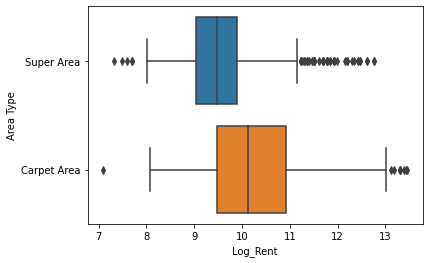

In [28]:
sns.boxplot(data=df,x='Log_Rent',y='Area Type')

The distinction between Carpet Area and Super Area is reflected in their correlations with the rent price. Carpet Area, which represents the actual living space, exhibits a stronger correlation with rent prices. This correlation is expected since the usable area within the walls of a property directly influences its rental value.

On the other hand, Super Area, which includes both the individual unit's usable area and the proportionate share of common areas, appears to have a less pronounced effect on rent prices. The presence of outliers in more expensive residences with a larger Super Area could be indicative of additional amenities such as pools or gardens, which may contribute to the higher prices.

<AxesSubplot:xlabel='Log_Rent', ylabel='City'>

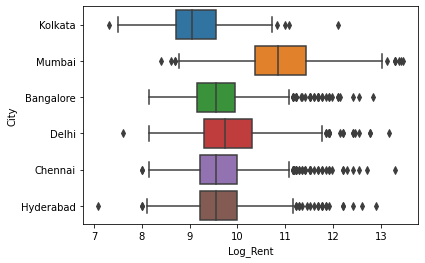

In [30]:
sns.boxplot(data=df,x='Log_Rent',y='City')

Based on the boxplot analysis, we can make observations about the rent prices across different cities. The boxplot reveals that Mumbai generally has higher rent prices compared to the other cities in our dataset. On the other hand, Kolkata appears to have relatively lower rent prices on average.

<AxesSubplot:xlabel='Log_Rent', ylabel='Point of Contact'>

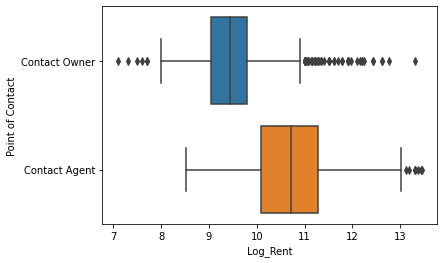

In [31]:
sns.boxplot(data=df,x='Log_Rent',y='Point of Contact')

An intriguing finding from the boxplot analysis is the potential correlation between agent involvement and rent prices. It appears that properties that do not require contacting an agent tend to have lower rent prices compared to those that do.

There could be several explanations for this observation. One possibility is that properties without agent involvement may be rented out directly by individual owners, who may be more inclined to set lower rental prices to attract tenants without incurring additional agent fees. On the other hand, properties that involve agents may have a higher perceived value or quality, leading to higher rental prices. Agents may possess market knowledge and negotiation skills that enable them to secure higher rental rates on behalf of property owners.

Additionally, it is plausible that more expensive properties are entrusted to agents to ensure that their full value is realized and to minimize the inconvenience for property owners. This could be the case for upscale properties or properties owned by corporations or companies, who rely on agents to effectively market and rent out their properties.

<AxesSubplot:xlabel='Log_Rent', ylabel='Tenant Preferred'>

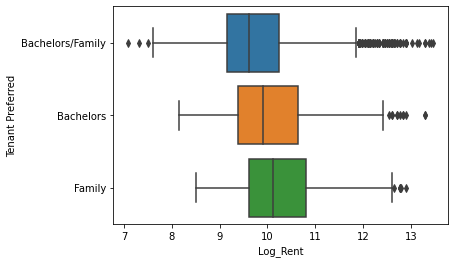

In [32]:
sns.boxplot(data=df,x='Log_Rent',y='Tenant Preferred')

The observation that habitats preferred for families tend to have higher rent prices aligns with expectations. This correlation can be attributed to several factors. Firstly, properties suitable for families often have more bedrooms and larger living spaces, which generally come with higher rental prices. Families typically require more space to accommodate their members and their specific needs, leading to a higher demand for larger properties.

Secondly, families often prioritize stability and long-term residence, which allows them to commit to higher rental prices. Compared to individuals or couples, families tend to have a more stable life situation, including steady income sources and longer-term housing requirements. This stability enables them to afford higher rent prices and prioritize properties that meet their family's specific needs.

Additionally, properties that cater to families may offer amenities and features that are desirable for a family-oriented lifestyle, such as proximity to schools, parks, and other family-friendly facilities. The inclusion of these amenities can contribute to higher rental prices for habitats preferred by families.

<AxesSubplot:xlabel='Log_Rent', ylabel='Furnishing Status'>

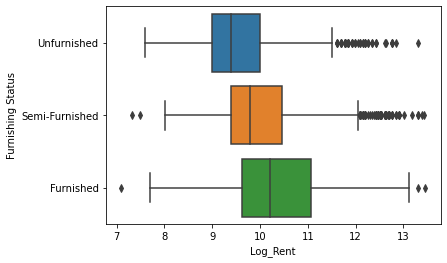

In [33]:
sns.boxplot(data=df,x='Log_Rent',y='Furnishing Status')

The analysis reveals a clear trend in rent prices based on the furnishing status of properties. On average, furnished housing tends to have higher rent prices compared to semi-furnished and unfurnished ones.

This correlation can be attributed to the added convenience and value that furnished properties offer to tenants. Furnished properties come with ready-to-use furniture, appliances, and amenities, which can save tenants the cost and hassle of purchasing and moving their own furnishings. The convenience and comfort provided by furnished properties justify the higher rental prices associated with them.

However, it is worth noting the presence of high-value outliers in both unfurnished and semi-furnished categories. These outliers suggest that there are instances where unfurnished or semi-furnished properties command higher rental prices. Potential explanations for this could include factors such as unique property features, desirable locations, or specific tenant preferences.

**Temporal Analysis of Rent Prices:**

To gain insights into the behavior of rent prices over time, let's examine the dataset's temporal aspect.

([<matplotlib.axis.XTick at 0x78073861fad0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

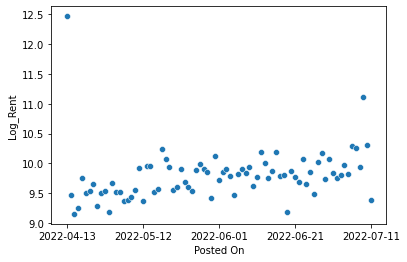

In [34]:
time_group = df.groupby(['Posted On']).mean()
sns.scatterplot(x=time_group.index,y=time_group['Log_Rent'])
locs, labels = plt.xticks()
new_locs=list(locs[::20]) #Slicing x ticks so they don't overlap
plt.xticks(new_locs) #Setting new ticks

From the temporal analysis of rent prices, it appears that the mean prices show an increasing trend as time progresses. However, given the limited duration of the dataset, which spans only a few months, it is difficult to ascertain if this trend is indicative of a more long-term pattern or if it is a temporary fluctuation.

It is worth noting that the outlier point in the top left corner, representing a single posting for a specific day, is one of the extreme values encountered previously. This outlier further highlights the presence of high-value rent prices in the dataset, potentially driven by unique circumstances or factors specific to that particular posting.

To gain a more comprehensive understanding of the temporal dynamics of rent prices, a more extended timeframe or additional data points would be necessary. This would enable the identification of broader trends and patterns in rent prices across different time periods.

**Feature Engineering**

Although our dataset may not contain an abundance of numerical features, one useful feature we can create is the "rent per square feet" metric. This feature provides insights into the rental pricing in relation to the size or area of the properties.

In [35]:
df['Cost_per_feet'] = df['Log_Rent']/np.log(df['Size']) #Take log of the size to properly scale boxplot

Let's see how this new feature is distributed:

<AxesSubplot:xlabel='Cost_per_feet', ylabel='City'>

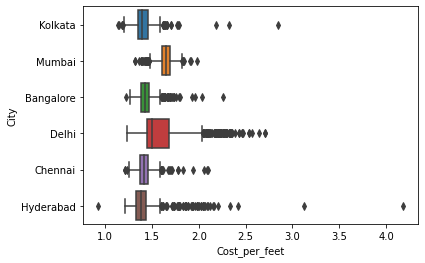

In [36]:
sns.boxplot(data=df,x='Cost_per_feet',y='City')

The observation that Mumbai has higher rent prices overall aligns with the previous analysis. However, it is intriguing to note that the prices per square feet in Mumbai appear to be less varied compared to Delhi. This finding seems counterintuitive, considering Mumbai's higher population density and reputation as a densely populated city.

One possible explanation for this disparity could be variations in wealth inequality and housing dynamics between the two cities. Delhi, being the capital city of India, may experience higher wealth inequality, leading to a wider range of housing options and rental prices. The presence of more "premium" or exclusive dwellings in Delhi could contribute to the greater variation in rent prices per square feet.

On the other hand, Mumbai's housing market may be more homogenous in terms of rental pricing per square feet. This could be due to factors such as higher demand and limited availability of affordable housing options, leading to a more consistent rental pricing structure.

Another fun, but not necessarily useful plot is to look at cost per feet vs rent price:

<AxesSubplot:xlabel='Log_Rent', ylabel='Cost_per_feet'>

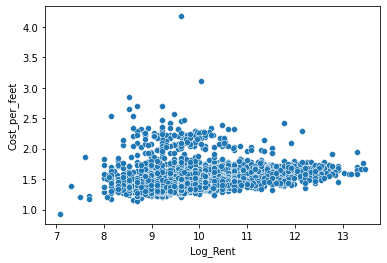

In [37]:
sns.scatterplot(data=df,x='Log_Rent',y='Cost_per_feet')

Upon further examination, it becomes apparent that at lower rent prices, individuals may be paying a lower amount per square footage. This finding aligns with expectations and indicates that in lower-priced rentals, the primary driving factor for the price is likely the available space.

As rent prices increase, other factors beyond space, such as location, amenities, or property features, come into play and contribute to the overall rental cost. These additional factors can cause rent prices to rise at a faster rate than the corresponding increase in square footage. Consequently, in higher-priced rentals, tenants may find themselves paying a higher amount per square footage.

In contrast, lower-priced rentals are more likely to prioritize affordability and offer a larger amount of space for the rent charged. Since these rentals primarily compete on the basis of space, tenants can benefit from a lower cost per square footage, making it a favorable option for those seeking a larger living area within a limited budget.

However, it is important to consider that this observation may not hold universally and can vary based on various factors, including local housing market conditions and individual preferences. Additionally, other non-space-related factors may still influence the rental price even in lower-priced rentals.

In addition to the rent per square feet feature, we can further enhance our analysis by engineering the following features:

    Rent Price per Room: Calculating the rent price per room can provide valuable insights into the cost of each individual room within a rental property. This feature allows for a more granular examination of how room-specific pricing contributes to the overall rent amount.

    Average Room Size: By calculating the average size of the rooms in a rental property, we can gain a better understanding of the spatial distribution and size dynamics within different properties. This feature can help identify any variations in room sizes and their potential impact on rent prices.

    Total Number of Rooms (Including Bathrooms): Incorporating the total number of rooms, including bathrooms, in a rental property can provide a comprehensive measure of the available living space. This feature takes into account both bedrooms and additional functional areas such as bathrooms, offering insights into the overall capacity and convenience of a property.

In [38]:
df['Log_Rent_per_Room'] = df['Log_Rent']/(df['BHK'])
df['Room_Size'] = df['Size']/(df['BHK'])
df['Total_Room'] = df['Bathroom']+(df['BHK'])

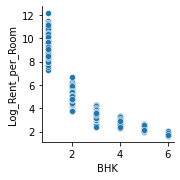

In [47]:
sns.pairplot(data=df,
            x_vars=df[['BHK']],y_vars=df[['Log_Rent_per_Room']])

The analysis uncovers a coherent relationship between the number of rooms and the corresponding rent per room prices. It is observed that as the number of living rooms increases, the price per room decreases. This finding aligns with the context of India's high population density, where dwellings with a larger number of rooms tend to have a relatively lower price per room.

To gain deeper insights into the connection between rent and the number of rooms, we can analyze a boxplot that takes into account the city variable. This visual representation enables us to compare the distribution of rent prices across various cities, categorized by the number of rooms in the rental properties. By examining this plot, we can explore any variations in rent prices based on the number of rooms and identify potential differences across different cities.

<AxesSubplot:xlabel='Log_Rent_per_Room', ylabel='City'>

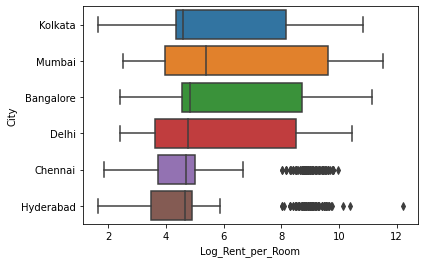

In [40]:
sns.boxplot(data=df,x='Log_Rent_per_Room',y='City')

The analysis suggests that Chennai and Hyderabad offer more favorable options for obtaining a higher number of rooms within a given rent budget. These cities appear to provide a relatively better value in terms of the number of rooms available for the corresponding rent prices. As such, individuals seeking rental properties with a larger number of rooms may find Chennai and Hyderabad to be desirable cities to consider.

<AxesSubplot:xlabel='Log_Rent_per_Room', ylabel='Tenant Preferred'>

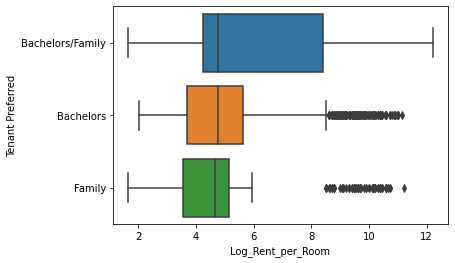

In [41]:
sns.boxplot(data=df,x='Log_Rent_per_Room',y='Tenant Preferred')

Consistent with expectations, family dwellings tend to have a higher number of rooms, likely driven by the need for privacy and space. Consequently, the cost per room in family-oriented properties is comparatively lower than in other types. To further investigate this, it may be worthwhile to create an additional feature that calculates the size divided by the number of rooms. This would enable us to examine whether the rooms in family-preferred housing are relatively smaller compared to other types of dwellings.

# Hypothesis Testing
We will examine 3 hypothesis, and perform statistical analysis to confirm or reject:
* Prices are increasing over time (I.e average of first derivative of price is above 0)
* Average price of dwelling is the same across "Contact Owner" and "Contact Agent" category
* If the variance in prices per square feet is similar between Mumbai and Delhi

**Hypothesis 1:**
We will test whether there is statistical evidence that the prices are not increasing over time.
* H_0: μ(d/dt(Price))=0 The average first momentum of the price is 0, and therefore prices do not change, on average, over time
* H_A: μ(d/dt(Price))>0 The average first momentum is greater than 0, and the prices increase over time

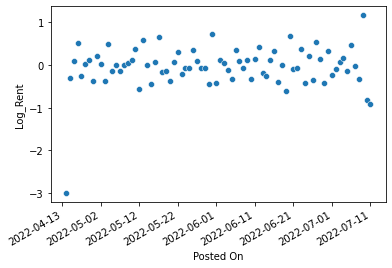

In [86]:
ch_price = df.groupby(['Posted On']).mean().diff().loc[:,['Log_Rent']] #Group by post date, take the means each day, take first differences
fig, ax = plt.subplots()
sns.scatterplot(x=time_group.index,y=ch_price['Log_Rent'])
freq = 10
ax.set_xticklabels(time_group.index[::freq])
xtix = ax.get_xticks()
ax.set_xticks(xtix[::freq])
fig.autofmt_xdate()


The outlier on the first day might skew our results - we can safely remove it from our analysis, since it was a single abnormally high listing on that day.

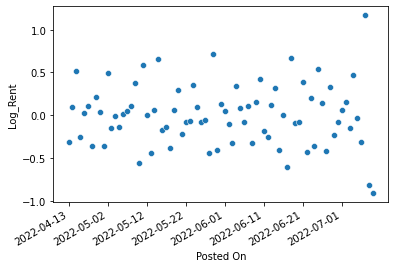

In [87]:
ch_price = ch_price[2:] #Element 0 is NA, due to differences we took, Element 1 is our outlier
fig, ax = plt.subplots()
sns.scatterplot(x=time_group.iloc[2:].index,y=ch_price['Log_Rent'])
freq = 10
ax.set_xticklabels(time_group.index[::freq])
xtix = ax.get_xticks()
ax.set_xticks(xtix[::freq])
fig.autofmt_xdate()

Looks good, lets see some statistics about this:

In [44]:
ch_mean = ch_price.mean()
print("Average change of rent, in log units, each day is:",ch_mean,'total amount of days avaliable:',len(ch_price))

Average change of rent, in log units, each day is: Log_Rent   -0.00
dtype: float64 total amount of days avaliable: 79


As we can see above, the average rate of increase is near 0, even slightly negative, but is it statistically significant?

We will perform t-test to test our hypothesis, since we only have 79 data points:

In [45]:
t,p = stats.ttest_1samp(ch_price,0) #testing against 0 mean
alpha=0.05
p_onetail= p/2 #one-tail test
print("t_value = {} , p_value ={},p_value_onetail ={}".format(t, p,p_onetail))

t_value = [-0.02248457] , p_value =[0.98211884],p_value_onetail =[0.49105942]


In [46]:
if p_onetail <alpha :
    print("Conclusion:Since p_value {} is less than alpha {} ".format (p_onetail,alpha) )
    print("Reject null hypothesis that the average increase in rent prices over time is 0.")


else:
    print("Conclusion:Since p value {} is greater than alpha {} ".format (p_onetail,alpha))
    print("Failed to reject null hypothesis that the average increase in rent prices over time is 0.")

Conclusion:Since p value [0.49105942] is greater than alpha 0.05 
Failed to reject null hypothesis that the average increase in rent prices over time is 0.


We failed to reject the null hypothesis - meaning we're pretty sure the average increase in prices day to day is around 0.

Ideally, we should get more data, weight the results by number of postings that day (Otherwise we might have outliers like the one we removed above, where singular listing skews the results too much) and account for types/sizes of dwellings posted - there is always a chance of periods where less expensive listings dominate the market, decreasing the average price.